In [1]:
import os
from astropy.io import fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube
import regions
import radio_beam
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab as pl
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import astropy.coordinates as coordinates

In [2]:
from astroquery.vizier import Vizier

In [4]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

# Merge MIRI

In [3]:
coord = SkyCoord('17:46:19.2862948840', '-28:35:02.9208448723', unit=(u.hourangle, u.deg))

In [36]:
project_obsnum = {
                  'brick': {
                      '2221': '001', 
                      '1182': '004',
                            },
                  'cloudc': {
                      '2221': '002',
                             },
                 }
miri_obsnum = {
            'brick' : {
                '2221': '002',
                        }, 
            'cloudc': {
                '2221': '001',
                        },
            }

In [81]:
filternames = ['f410m', 'f212n', 'f466n', 'f405n', 'f187n', 'f182m']
all_filternames = ['f410m', 'f212n', 'f466n', 'f405n', 'f187n', 'f182m', 'f444w', 'f356w', 'f200w', 'f115w']
#obs_filters = {'2221': filternames,
#               '1182': ['f444w', 'f356w', 'f200w', 'f115w']
#              }
obs_filters = {
                'brick': {
                    '2221': filternames,
                    '1182': ['f444w', 'f356w', 'f200w', 'f115w'],
                          },
                'cloudc': {
                    '2221': filternames,
                           },
               }
miri_filternames = {
                        'brick': {
                            '2221': ['F2550W'],
                            '1182': [],
                        },
                        'cloudc': {
                            '2221': ['F2550W'],
                        },
                    }


In [75]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
filn = 'F2550W'
obsid = '2221'
target = 'cloudc'
module = 'merged'
glob.glob(f"{basepath}/{filn.upper()}/pipeline/"
                             f"jw0{obsid}-o{miri_obsnum[target][obsid]}_t001_miri*{filn.lower()}*_i2d.fits")

['/orange/adamginsburg/jwst/cloudc//F2550W/pipeline/jw02221-o001_t001_miri_f2550w_i2d.fits']

In [96]:
imgfns = [x
          for obsid in obs_filters[target]
          for filn in obs_filters[target][obsid]
          for x in glob.glob(f"{basepath}/{filn.upper()}/pipeline/"
                             f"jw0{obsid}-o{project_obsnum[target][obsid]}_t001_nircam*{filn.lower()}*{module}_i2d.fits")
          if f'{module}_' in x or f'{module}1_' in x
         ]
imgfns

['/orange/adamginsburg/jwst/cloudc//F410M/pipeline/jw02221-o002_t001_nircam_clear-f410m-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F212N/pipeline/jw02221-o002_t001_nircam_clear-f212n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F466N/pipeline/jw02221-o002_t001_nircam_clear-f466n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F187N/pipeline/jw02221-o002_t001_nircam_clear-f187n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F182M/pipeline/jw02221-o002_t001_nircam_clear-f182m-merged_i2d.fits']

In [87]:
imgfns_miri = [x
          for obsid in miri_filternames[target]
          for filn in miri_filternames[target][obsid]
          for x in glob.glob(f"{basepath}/{filn.upper()}/pipeline/"
                             f"jw0{obsid}-o{miri_obsnum[target][obsid]}_t001_miri*{filn.lower()}*_i2d.fits")
         ]
imgfns_miri

['/orange/adamginsburg/jwst/cloudc//F2550W/pipeline/jw02221-o001_t001_miri_f2550w_i2d.fits']

In [97]:
for x in imgfns_miri:
    imgfns.append(x)

In [98]:
imgfns

['/orange/adamginsburg/jwst/cloudc//F410M/pipeline/jw02221-o002_t001_nircam_clear-f410m-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F212N/pipeline/jw02221-o002_t001_nircam_clear-f212n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F466N/pipeline/jw02221-o002_t001_nircam_clear-f466n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F187N/pipeline/jw02221-o002_t001_nircam_clear-f187n-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F182M/pipeline/jw02221-o002_t001_nircam_clear-f182m-merged_i2d.fits',
 '/orange/adamginsburg/jwst/cloudc//F2550W/pipeline/jw02221-o001_t001_miri_f2550w_i2d.fits']

# Proper Motion Catalog

In [7]:
print(Vizier.ROW_LIMIT)
Vizier.ROW_LIMIT = 100000
pmq = Vizier.query_region(coord, radius=15*u.arcsec, catalog='J/A+A/662/A11/tablea1')#[0] ### This one??? 


100000


In [8]:
pmq

Empty TableList

In [ ]:
# Show continuum on NIR HST
fh = fits.open('/orange/adamginsburg/cmz/hst_paschenalpha/hlsp_hpsgc_hst_nicmos-nic3_gc_f190n_v1_img.fits')
fh[0].header['CTYPE1'] = 'GLON-TAN'
fh[0].header['CTYPE2'] = 'GLAT-TAN'
nirwcs = WCS(fh[0].header)
preg = region.to_pixel(nirwcs)
msk = preg.to_mask()
nirim = msk.cutout(fh[0].data.squeeze());
slcs,_ = msk.get_overlap_slices(fh[0].data.squeeze().shape)

fig = pl.figure()
ax = pl.subplot(projection=nirwcs[slcs])
#ax = pl.subplot(projection=contwcs_co)
im = ax.imshow(nirim, cmap='gray_r', norm=simple_norm(nirim, stretch='log', max_percent=99.5, min_percent=1),
               #transform=ax.get_transform(nirwcs[slcs]),
              )
ax.contour(contim.data, transform=ax.get_transform(contwcs),
           levels=[0.0008,  0.0015, ]);
ax.set_xlabel("Galactic Longitude")
ax.grid()
ax.set_ylabel("Galactic Latitude")
ax.set_title("HST F190")
axlims = ax.axis()

crdpm = SkyCoord(pmq['RAJ2000'], pmq['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic
#ax.scatter_coord(crdpm, marker='.', s=15)
for row in pmq:
    crdpm = SkyCoord(row['RAJ2000'], row['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic
    ax.arrow(crdpm.l.deg, crdpm.b.deg, row['pml']/36000, row['pmb']/36000,
             width=1e-5,
             color='r',
             transform=ax.get_transform('world'))

ax.axis(axlims)

#fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/HSTF190nir_continuum_withPM.pdf', bbox_inches='tight')

# Miri Real Sources

In [3]:
ls /orange/adamginsburg/jwst/cloudc/catalogs/*_merged*.fits

/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky0_merged-reproject_photometry_tables_merged_2024202.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky0_merged_photometry_tables_merged_2024202.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky0_nrca_photometry_tables_merged.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky0_nrcb_photometry_tables_merged.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky1_merged-reproject_photometry_tables_merged.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky1_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky1_nrca_photometry_tables_merged.fits
/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky1_nrcb_photometry_tables_merg

In [4]:
ls /orange/adamginsburg/jwst/cloudc/regions_/*miri*

/orange/adamginsburg/jwst/cloudc/regions_/miri-1.reg
/orange/adamginsburg/jwst/cloudc/regions_/miri-2.reg
/orange/adamginsburg/jwst/cloudc/regions_/miri-3.reg
/orange/adamginsburg/jwst/cloudc/regions_/miri-4.reg
/orange/adamginsburg/jwst/cloudc/regions_/miri-5.reg
/orange/adamginsburg/jwst/cloudc/regions_/miri_catalog.reg


In [3]:
cat = Table.read('/orange/adamginsburg/jwst/cloudc/F2550W/f2550w__crowdsource_nsky1.fits')
#cat = Table.read('/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky1_merged_photometry_tables_merged.fits')

In [4]:
crds = cat['skycoord']
crds

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.55037874, -28.5848871 ), (266.55107161, -28.57557444),
     (266.55123939, -28.57403159), ..., (266.59068952, -28.59744924),
     (266.59075727, -28.59681786), (266.59078187, -28.59775847)]>

In [7]:
mir = fits.open('/orange/adamginsburg/jwst/cloudc/images/jw02221-o001_t001_miri_f2550w_i2d.fits')

In [5]:
manual_reg = regions.Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/miri_catalog.reg', format='ds9')
ra = []
dec = []
for reg in manual_reg: 
    ra.append(reg.center.ra)
    dec.append(reg.center.dec)
manual_catalog = SkyCoord(ra=ra, dec=dec)

In [10]:
#idx,sep2,d3d = coordinates.match_coordinates_sky(matchcoord=c, catalogcoord=manual_catalog)

In [11]:
matches, sep, _ = crds.match_to_catalog_sky(manual_catalog, nthneighbor=1)
mask = sep < 0.33*u.arcsec
masked_crds = crds[mask]

In [19]:
cat['real_miri'] = mask

In [24]:
cat.write('/orange/adamginsburg/jwst/cloudc/F2550W/f2550w__crowdsource_nsky1_real.fits', format='fits')

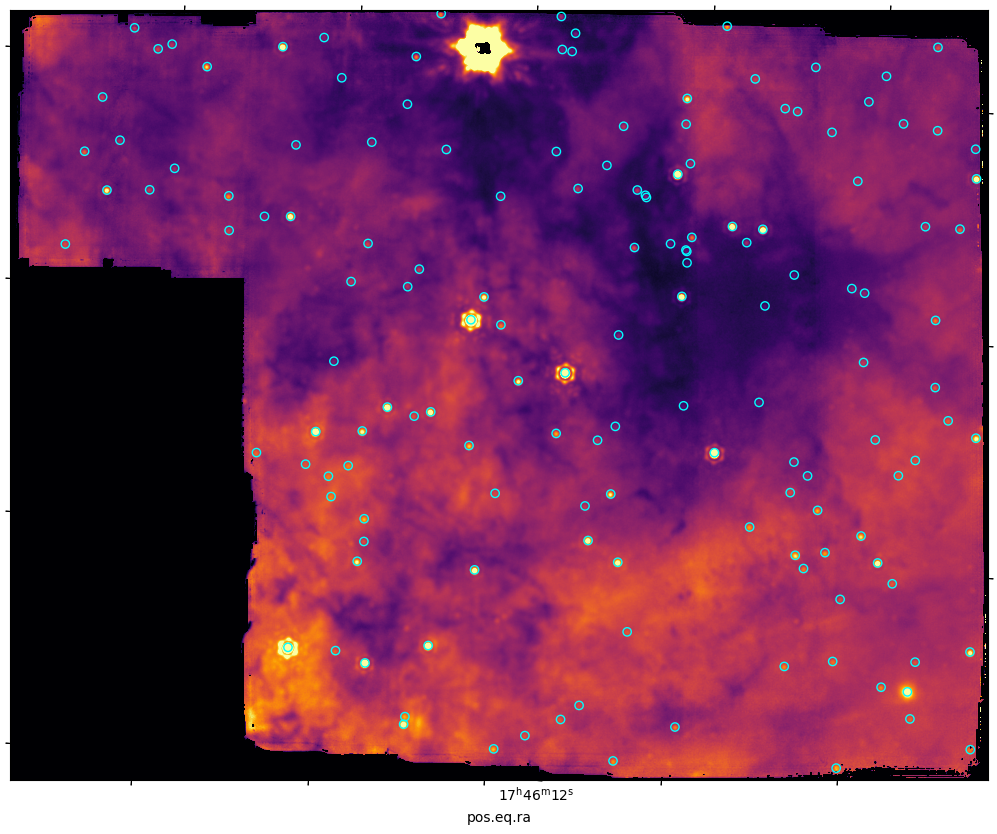

In [12]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=WCS(mir['SCI'].header))
ax.imshow(mir['SCI'].data, cmap='inferno', vmin=850, vmax=1000)
ax.scatter(masked_crds.ra, masked_crds.dec, edgecolor='cyan', facecolor='none', transform=ax.get_transform('world'))


## VVV Catlog

In [13]:
ls /orange/adamginsburg/jwst/cloudc/catalogs/*vvv*

/orange/adamginsburg/jwst/cloudc/catalogs/jw02221-o002_t001_nircam_clear-F405N-merged_vvvcat.ecsv
/orange/adamginsburg/jwst/cloudc/catalogs/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits


In [14]:
cat_vvv = Table.read('/orange/adamginsburg/jwst/cloudc/catalogs/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits')
crds_vvv = cat_vvv['skycoord']

In [15]:
matches, sep, _ = crds_vvv.match_to_catalog_sky(masked_crds, nthneighbor=1)

In [16]:
mask_vvv = sep < 0.2*u.arcsec

In [17]:
masked_vvv = crds_vvv[mask_vvv]
other_pts = 

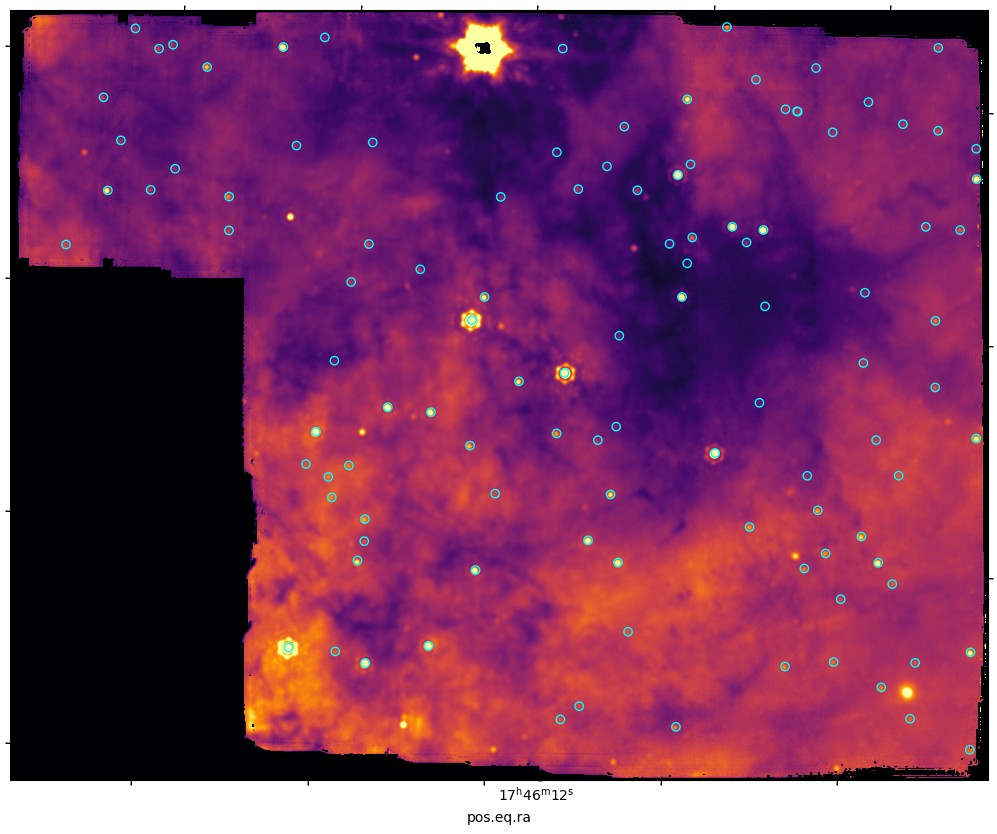

In [18]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=WCS(mir['SCI'].header))
ax.imshow(mir['SCI'].data, cmap='inferno', vmin=850, vmax=1000)
ax.scatter(masked_vvv.ra, masked_vvv.dec, edgecolor='cyan', facecolor='none', transform=ax.get_transform('world'))


## NIRCam Catalog

In [142]:
nirtable = Table.read('/orange/adamginsburg/jwst/cloudc/catalogs/crowdsource_nsky1_merged_photometry_tables_merged.fits')
basetable = Table.read('/orange/adamginsburg/jwst/cloudc/F2550W/f2550w__crowdsource_nsky1_real.fits')


In [143]:
#nirtable[nirtable['qf_f405n'] > 0.6]
basetable[basetable['real_miri']==True]#[:4]

x,y,flux,passno,dx,dy,dflux,qf,rchi2,fracflux,fluxlbs,dfluxlbs,fwhm,spread_model,dspread_model,fluxiso,xiso,yiso,flags,sky,skycoord,real_miri
,,,,,,,,,,,,,,,,,,,,"deg,deg",
float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,SkyCoord,bool
1268.8130182260436,17.011491575502834,4688.0913,0.0,0.017477052,0.01835733,19.17389,0.9784062,11.372824,0.9316079,4454.587,31.728104,7.2113757,0.0021975636,0.00015043054,3415.0908,0.09651178971265234,0.20365109922554792,0,925.58307,"266.5517260731956,-28.57508233367388",True
925.9573669372194,28.055413769256546,3419.6206,0.0,0.018904036,0.019537114,14.858221,1.0,8.4468775,0.9711557,3396.7197,24.378094,7.1992536,0.00024867058,0.00015937004,2499.5984,-0.2318139730454746,0.4866588431442356,0,923.9931,"266.55128344047347,-28.585643089783396",True
1474.8671864444289,45.34603008017128,3080.604,0.0,0.027630208,0.02716551,19.225086,0.99072796,29.245476,0.8335971,2743.5999,31.747478,7.211375,0.0042510033,0.00023089591,2216.649,0.35031754321929415,-0.8270412650888375,0,922.5,"266.55321588295794,-28.568809642542625",True
742.5926795502976,46.54764398583412,4869.93,0.0,0.012426184,0.013432604,14.644848,1.0,11.954466,0.98122394,4658.4453,24.121592,7.17627,0.0019260049,0.00011543223,3533.3018,-0.1805688605707801,-0.6593451233119252,0,923.47925,"266.5514872070466,-28.5913178797774",True
790.5447587134357,66.91401550774178,1774.224,0.0,0.025761735,0.026606284,10.612583,0.9999999,6.0523205,0.9257034,1735.4679,17.720654,7.1805553,0.0024687052,0.00021835472,1301.7264,-0.3006263373001394,-0.7327212874503821,0,921.3147,"266.55231604351684,-28.58988737325987",True
1021.0847564841997,80.14349209793336,4301.861,0.0,0.008709282,0.009044474,8.56501,0.99999994,30.059479,0.999803,4598.746,14.239508,7.2088776,-0.00080382824,7.0569185e-05,3157.6543,0.6171172912546955,0.4806464512385888,0,909.2438,"266.55333655939637,-28.58283005783025",True
604.2516611597832,84.47963303511578,10863.692,0.0,0.0043700547,0.004585096,10.978614,1.0,147.49619,0.98645985,10458.338,18.42676,7.169199,0.002430141,3.692995e-05,7814.5044,0.8256845977953782,0.267141648970686,0,936.6659,"266.5524803569994,-28.595650195773917",True
845.3726754376274,91.72170406913654,1796.3352,0.0,0.02079141,0.021409214,8.527739,0.99999994,5.227263,0.8563831,1733.5242,14.245397,7.185801,0.0022043586,0.00017029257,1305.0219,-0.26255717682379115,0.01451571776282257,0,923.5381,"266.5533169355441,-28.58825496997238",True


In [144]:
nirtable_mask = np.logical_and(nirtable['qf_f405n']>0.6, nirtable['qf_f410m']>0.6)
nirtable_use = tbl = nirtable[nirtable_mask]

In [145]:
nirtable_use[:3]

skycoord_ref,skycoord_ref_filtername,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_model_f182m,fluxiso_f182m,xiso_f182m,yiso_f182m,flags_f182m,sky_f182m,mask_f182m,flux_jy_f182m,eflux_jy_f182m,mag_ab_f182m,emag_ab_f182m,near_saturated_f182m_f182m,replaced_saturated_f182m,flux_jy_410m405,mag_ab_410m405,flux_jy_405m410,mag_ab_405m410,flux_jy_182m187,mag_ab_182m187,flux_jy_187m182,mag_ab_187m182
"deg,deg",,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy
SkyCoord,bytes5,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,b

In [146]:
basecrds = basetable['skycoord']
crds = tbl['skycoord_ref']

In [147]:
matches, sep, _ = crds.match_to_catalog_sky(basecrds, nthneighbor=1)

In [148]:
len(sep)

85533

In [149]:
matchtb = tbl[matches]

In [150]:
matchtb[:3]

skycoord_ref,skycoord_ref_filtername,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_model_f182m,fluxiso_f182m,xiso_f182m,yiso_f182m,flags_f182m,sky_f182m,mask_f182m,flux_jy_f182m,eflux_jy_f182m,mag_ab_f182m,emag_ab_f182m,near_saturated_f182m_f182m,replaced_saturated_f182m,flux_jy_410m405,mag_ab_410m405,flux_jy_405m410,mag_ab_405m410,flux_jy_182m187,mag_ab_182m187,flux_jy_187m182,mag_ab_187m182
"deg,deg",,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy
SkyCoord,bytes5,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,b

In [151]:
badsep = sep > 0.15*u.arcsec

In [152]:
(0.15*u.arcsec).to(u.deg)

<Quantity 4.16666667e-05 deg>

In [153]:
wl = 'f2550w'

In [154]:
from astropy.table import Table, Column, MaskedColumn
from astropy import table


In [157]:
for cn in basetable.colnames:
    if isinstance(basetable[cn], SkyCoord):
        basetable.rename_column(cn, f"{cn}_{wl}")
        basetable[f'mask_{wl}'] = badsep
    else:
        basetable[f'{cn}_{wl}'] = MaskedColumn(data=basetable[cn], name=f'{cn}_{wl}')
        basetable[f'{cn}_{wl}'].mask[badsep] = True
        if hasattr(basetable[cn], 'meta'):
            basetable[f'{cn}_{wl}'].meta = basetable[cn].meta
        basetable.remove_column(cn)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7848 but corresponding boolean dimension is 85533

In [128]:
basetable1 = table.hstack([matchtb, basetable], join_type='exact')

In [127]:
basetable[basetable['real_miri_f2550w'] == True]

skycoord_f2550w,x_f2550w,y_f2550w,flux_f2550w,passno_f2550w,dx_f2550w,dy_f2550w,dflux_f2550w,qf_f2550w,rchi2_f2550w,fracflux_f2550w,fluxlbs_f2550w,dfluxlbs_f2550w,fwhm_f2550w,spread_model_f2550w,dspread_model_f2550w,fluxiso_f2550w,xiso_f2550w,yiso_f2550w,flags_f2550w,sky_f2550w,mask_f2550w,real_miri_f2550w
"deg,deg",,,,,,,,,,,,,,,,,,,,,,
SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,bool
"266.5517260731956,-28.57508233367388",1268.8130182260436,17.011491575502834,4688.0913,0.0,0.017477052,0.01835733,19.17389,0.9784062,11.372824,0.9316079,4454.587,31.728104,7.2113757,0.0021975636,0.00015043054,3415.0908,0.09651178971265234,0.20365109922554792,0,925.58307,True,True
"266.55128344047347,-28.585643089783396",925.9573669372194,28.055413769256546,3419.6206,0.0,0.018904036,0.019537114,14.858221,1.0,8.4468775,0.9711557,3396.7197,24.378094,7.1992536,0.00024867058,0.00015937004,2499.5984,-0.2318139730454746,0.4866588431442356,0,923.9931,True,True
"266.55321588295794,-28.568809642542625",1474.8671864444289,45.34603008017128,3080.604,0.0,0.027630208,0.02716551,19.225086,0.99072796,29.245476,0.8335971,2743.5999,31.747478,7.211375,0.0042510033,0.00023089591,2216.649,0.35031754321929415,-0.8270412650888375,0,922.5,True,True
"266.5514872070466,-28.5913178797774",742.5926795502976,46.54764398583412,4869.93,0.0,0.012426184,0.013432604,14.644848,1.0,11.954466,0.98122394,4658.4453,24.121592,7.17627,0.0019260049,0.00011543223,3533.3018,-0.1805688605707801,-0.6593451233119252,0,923.47925,True,True
"266.55231604351684,-28.58988737325987",790.5447587134357,66.91401550774178,1774.224,0.0,0.025761735,0.026606284,10.612583,0.9999999,6.0523205,0.9257034,1735.4679,17.720654,7.1805553,0.0024687052,0.00021835472,1301.7264,-0.3006263373001394,-0.7327212874503821,0,921.3147,True,True
"266.55333655939637,-28.58283005783025",1021.0847564841997,80.14349209793336,4301.861,0.0,0.008709282,0.009044474,8.56501,0.99999994,30.059479,0.999803,4598.746,14.239508,7.2088776,-0.00080382824,7.0569185e-05,3157.6543,0.6171172912546955,0.4806464512385888,0,909.2438,True,True
"266.5524803569994,-28.595650195773917",604.2516611597832,84.47963303511578,10863.692,0.0,0.0043700547,0.004585096,10.978614,1.0,147.49619,0.98645985,10458.338,18.42676,7.169199,0.002430141,3.692995e-05,7814.5044,0.8256845977953782,0.267141648970686,0,936.6659,True,True
"266.5533169355441,-28.58825496997238",845.3726754376274,91.72170406913654,1796.3352,0.0,0.02079141,0.021409214,8.527739,0.99999994,5.227263,0.8563831,1733.5242,14.245397,7.185801,0.0022043586,0.00017029257,1305.0219,-0.26255717682379115,0.01451571776282257,0,923.5381,True,True


In [130]:
basetable1#[basetable1['real_miri_f2550w'] == True]#[basetable['qf_f2550w'] > 0.6]

skycoord_ref,skycoord_ref_filtername,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_model_f182m,fluxiso_f182m,xiso_f182m,yiso_f182m,flags_f182m,sky_f182m,mask_f182m,flux_jy_f182m,eflux_jy_f182m,mag_ab_f182m,emag_ab_f182m,near_saturated_f182m_f182m,replaced_saturated_f182m,flux_jy_410m405,mag_ab_410m405,flux_jy_405m410,mag_ab_405m410,flux_jy_182m187,mag_ab_182m187,flux_jy_187m182,mag_ab_187m182,skycoord_f2550w,x_f2550w,y_f2550w,flux_f2550w,passno_f2550w,dx_f2550w,dy_f2550w,dflux_f2550w,qf_f2550w,rchi2_f2550w,fracflux_f2550w,fluxlbs_f2550w,dfluxlbs_f2550w,fwhm_f2550w,spread_model_f2550w,dspread_model_f2550w,fluxiso_f2550w,xiso_f2550w,yiso_f2550w,flags_f2550w,sky_f2550w,mask_f2550w,real_miri_f2550w
"deg,deg",,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,deg,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,Jy,Jy,,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,"deg,deg",,,,,,,,,,,,,,,,,,,,,,
SkyCoord,bytes5,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int32,float32,bool,float32,float32,float32,float32,bool,bool,float64,int64,SkyCoord,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,f

In [194]:
matches1, sep1, _ = masked_vvv.match_to_catalog_sky(masked_crds, nthneighbor=1)

In [196]:
np.histogram(sep1)

(array([ 4,  6, 14,  9, 12, 15, 16, 12, 14,  8]),
 <Angle [3.28543482e-06, 8.39532039e-06, 1.35052060e-05, 1.86150915e-05,
         2.37249771e-05, 2.88348627e-05, 3.39447482e-05, 3.90546338e-05,
         4.41645194e-05, 4.92744049e-05, 5.43842905e-05] deg>)

In [154]:
(3.28543485e-06*u.deg).to(u.arcsec)

<Quantity 0.01182757 arcsec>

In [157]:
(2.34361810e-04*u.deg).to(u.arcsec)

<Quantity 0.84370252 arcsec>

In [197]:
np.mean(sep1)

<Angle 3.15960749e-05 deg>

In [198]:
np.median(sep1)

<Angle 3.34406058e-05 deg>

In [140]:
cat_nir_qf = cat_nir[cat_nir['qf_f405n'] > 0.6]
cat_mir_qf = cat_mir[cat_mir['qf'] > 0.6]

In [199]:
crds_nir = cat_nir_qf['skycoord_ref']
crds_mir = masked_crds#cat_mir['skycoord']

In [202]:
matches, sep, _ = crds_mir.match_to_catalog_sky(crds_nir, nthneighbor=1)
mask_mir = sep < 0.15*u.arcsec
masked_crds_mir = crds_mir[mask_mir]

In [142]:
#mask_mir = np.full(crds.shape, False)
#for c in range(len(crds_mir)):
#    idx,sep2,d3d = coordinates.match_coordinates_sky(matchcoord=crds_mir[c], catalogcoord=crds_nir)
#    if sep2 < 0.2*u.arcsec:
#        mask_mir[c] = True

In [143]:
#masked_crds_mir = crds_mir[mask_mir]

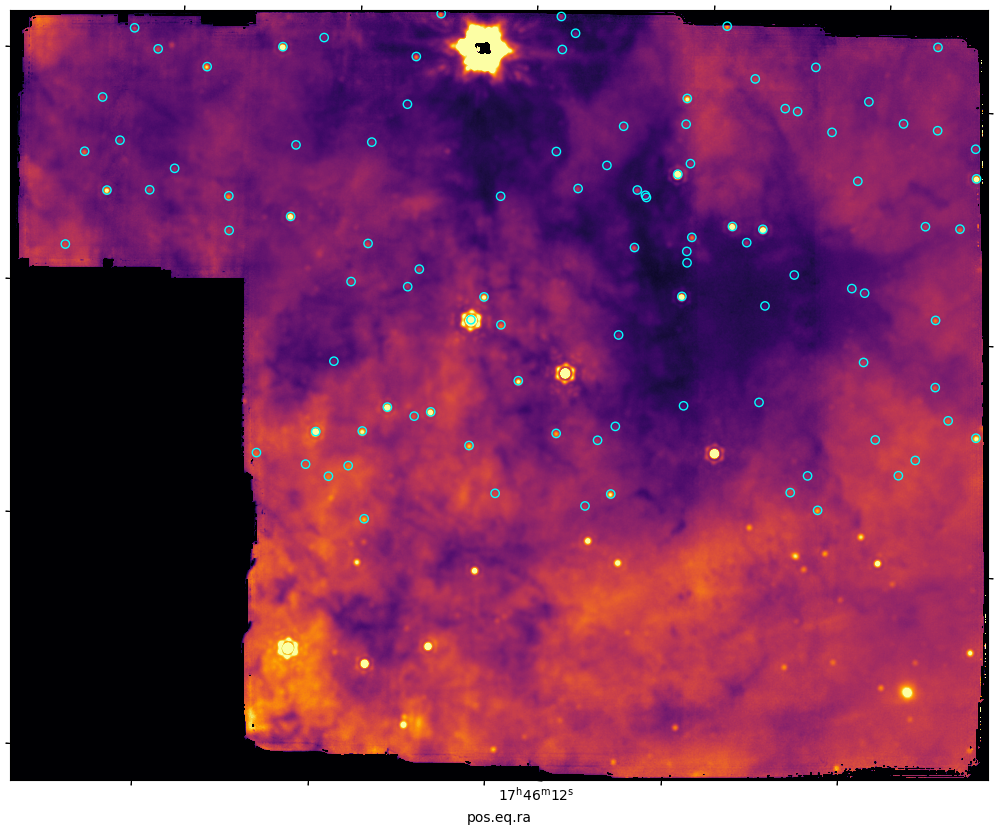

In [203]:
plt.figure(figsize=(24,10))
ax = plt.subplot(111, projection=WCS(mir['SCI'].header))
ax.imshow(mir['SCI'].data, cmap='inferno', vmin=850, vmax=1000)
ax.scatter(masked_crds_mir.ra, masked_crds_mir.dec, edgecolor='cyan', facecolor='none', transform=ax.get_transform('world'))
